## **K-Means Clustering with Time Series: Global Life Expectancy**

This notebook will go through an example of K-Means clustering of time series using the example of life expectancy at birth over time for all countries (data available from the [World Bank](https://data.worldbank.org/indicator/SP.DYN.LE00.IN)).

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans

In [ ]:
# -- set plotting defaults
plt.style.use("bmh")
px.defaults.template = "ggplot2"

In [ ]:
# -- read in the world bank data
fname = "/content/drive/Shareddrives/mlpp25/data/worldbank/API_SP.DYN.LE00.IN_DS2_en_csv_v2_820880.csv"
wbdat = pd.read_csv(fname, skiprows=4)
wbdat

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,75.15800,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,NaN,NaN,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,61.55300,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,NaN,NaN,NaN
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,56.33000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,NaN,NaN,NaN
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,76.91400,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,NaN,NaN,NaN
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.14878,70.497561,70.797561,71.097561,71.346341,71.646341,71.946341,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919,30.163,30.500,30.943,31.501,32.175,...,65.76800,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,NaN,NaN,NaN
261,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.406,48.777,49.142,49.509,49.888,50.284,...,58.89500,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,NaN,NaN,NaN
262,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687,47.084,47.446,47.772,48.068,48.351,...,57.12600,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,NaN,NaN,NaN


In [ ]:
# -- display the columns
wbdat.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [ ]:
wbdat[wbdat["Country Name"] == "Indonesia"]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
104,Indonesia,IDN,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.664,47.276,47.877,48.468,49.051,49.629,...,69.542,69.866,70.179,70.481,70.768,71.035,71.282,NaN,NaN,NaN


In [ ]:
# -- set (in place) the country name as the index
wbdat.set_index("Country Name", inplace=True) #country name is the new index instead of sno.
#inplace modifies the dataframe.
wbdat.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,67.762,...,75.158,75.299,75.441,75.583,75.725,75.868,76.010,NaN,NaN,NaN
Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,35.430,...,61.553,62.054,62.525,62.966,63.377,63.763,64.130,NaN,NaN,NaN
Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,39.454,...,56.330,57.236,58.054,58.776,59.398,59.925,60.379,NaN,NaN,NaN
Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,66.110,...,76.914,77.252,77.554,77.813,78.025,78.194,78.333,NaN,NaN,NaN
Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
wbdat.columns #the columns start from country code, instead of country name, because, now the country name column is the index.

Index(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [ ]:
# -- extract life expectancy time series
cols = wbdat.columns[3:-3]
wbdat = wbdat[cols]
wbdat.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,68.436,68.784,...,74.725,74.872,75.017,75.158,75.299,75.441,75.583,75.725,75.868,76.010
Afghanistan,32.446,32.962,33.471,33.971,34.463,34.948,35.430,35.914,36.403,36.900,...,59.930,60.484,61.028,61.553,62.054,62.525,62.966,63.377,63.763,64.130
Angola,37.524,37.811,38.113,38.430,38.760,39.102,39.454,39.813,40.178,40.546,...,53.243,54.311,55.350,56.330,57.236,58.054,58.776,59.398,59.925,60.379
Albania,62.283,63.301,64.190,64.914,65.463,65.850,66.110,66.304,66.487,66.689,...,75.912,76.221,76.562,76.914,77.252,77.554,77.813,78.025,78.194,78.333
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# -- convert columns to integers
wbdat.columns = wbdat.columns.astype(int)
wbdat.columns

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype='int64')

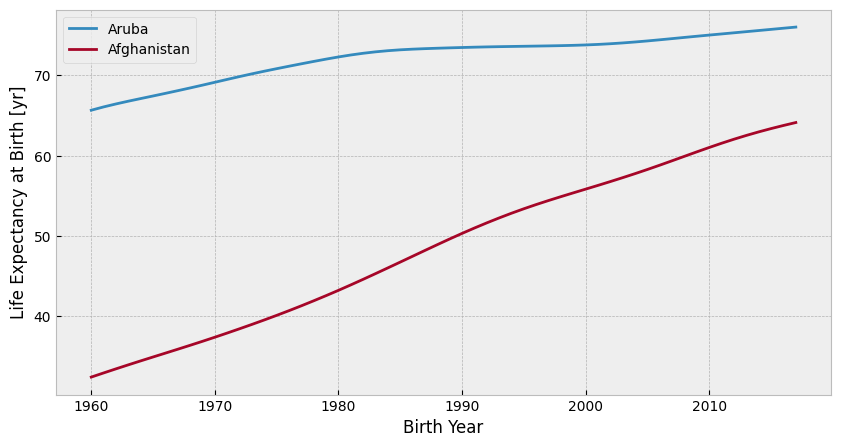

In [ ]:
# -- plot a couple of countries
ax = wbdat.iloc[0].plot(figsize=(10, 5))
ax = wbdat.iloc[1].plot(ax=ax)
ax.set_xlabel("Birth Year")
ax.set_ylabel("Life Expectancy at Birth [yr]")
ax.legend()

# -- get the figure and show it
ax.get_figure().show()

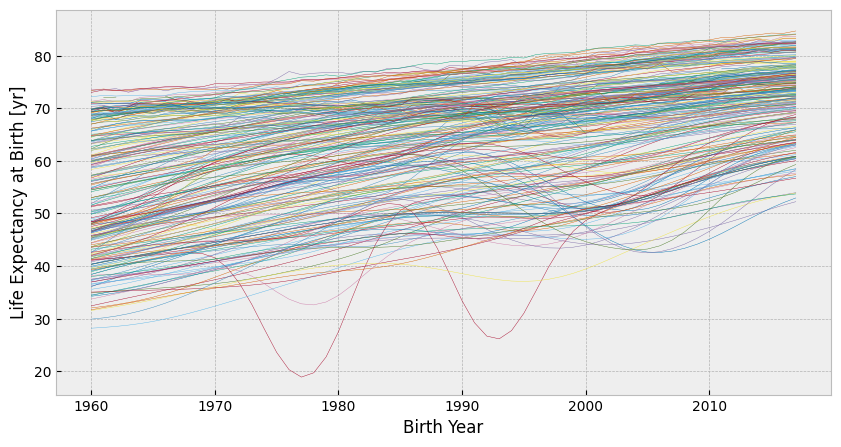

In [ ]:
# -- plot them all
ax = wbdat.T.plot(legend=False, lw=0.3, figsize=(10, 5))
ax.set_xlabel("Birth Year")
ax.set_ylabel("Life Expectancy at Birth [yr]")

# -- get the figure and show it
ax.get_figure().show()

In [ ]:
# -- plot all time series with a "heatmap"
fig = px.imshow(wbdat, color_continuous_scale="viridis", labels = {"color": "life expectancy at birth [yr]"}, width=1000, aspect="auto")

# -- remove the country names
fig.update_yaxes(showticklabels=False)

fig.show()

In [ ]:
# -- remove rows with NaNs in the time series
wbsub = wbdat.dropna()

In [ ]:
# -- plot all time series with a "heatmap"
# -- plot all time series with a "heatmap"
fig = px.imshow(wbsub, color_continuous_scale="viridis", labels = {"color": "life expectancy at birth [yr]"}, width=1000, aspect="auto")

# -- remove the country names
fig.update_yaxes(showticklabels=False)

fig.show()

In [ ]:
# -- now let's cluster, but first (of course) standardize across columns to
#    cluster based on trends in the time series
wbsub_st = wbsub.sub(wbsub.mean(axis=1), axis=0).div(wbsub.std(axis=1), axis=0)
wbsub_st

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,-2.362465,-2.215279,-2.083097,-1.960561,-1.844098,-1.729064,-1.612244,-1.493280,-1.371458,-1.247136,...,0.875277,0.927793,0.979594,1.029966,1.080338,1.131067,1.181796,1.232526,1.283612,1.334341
Afghanistan,-1.641662,-1.589430,-1.537907,-1.487294,-1.437492,-1.388398,-1.339607,-1.290615,-1.241116,-1.190807,...,1.140400,1.196479,1.251545,1.304688,1.355402,1.403079,1.447719,1.489322,1.528395,1.565545
Angola,-1.446828,-1.399340,-1.349371,-1.296919,-1.242317,-1.185729,-1.127486,-1.068086,-1.007692,-0.946802,...,1.154069,1.330782,1.502697,1.664850,1.814758,1.950106,2.069570,2.172487,2.259686,2.334805
Albania,-2.220027,-1.973346,-1.757924,-1.582484,-1.449451,-1.355673,-1.292670,-1.245660,-1.201316,-1.152367,...,1.082546,1.157422,1.240053,1.325350,1.407254,1.480434,1.543195,1.594567,1.635519,1.669201
Arab World,-1.908328,-1.832836,-1.757922,-1.683200,-1.608359,-1.533915,-1.460739,-1.389467,-1.319945,-1.251408,...,1.061428,1.088769,1.113186,1.135890,1.158111,1.180761,1.203868,1.227387,1.251115,1.274729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,-1.763921,-1.705370,-1.647229,-1.589087,-1.529922,-1.469529,-1.407702,-1.344443,-1.279955,-1.213829,...,1.154615,1.206615,1.258000,1.307748,1.354834,1.398850,1.439385,1.476440,1.510219,1.541133
"Yemen, Rep.",-1.821429,-1.801364,-1.773652,-1.737224,-1.691339,-1.635915,-1.571363,-1.499328,-1.421702,-1.339470,...,1.054453,1.084303,1.108479,1.126488,1.138987,1.146881,1.150993,1.152555,1.152719,1.152637
South Africa,-1.907506,-1.825255,-1.744334,-1.662970,-1.578946,-1.491153,-1.397817,-1.299604,-1.196069,-1.087215,...,-0.365802,-0.121931,0.146104,0.417909,0.676190,0.906536,1.099194,1.250172,1.361909,1.447264


In [ ]:
wbsub_st.iloc[0].std()

1.0

In [ ]:
# -- plot all time series with a "heatmap"
fig =px.imshow(wbsub_st, color_continuous_scale="viridis", labels = {"color": "life expectancy at birth [standardized]"}, width=1000, aspect="auto")

# -- remove the country names
fig.update_yaxes(showticklabels=False)

fig.show()

In [ ]:
# -- define the features
feat = wbsub_st

In [ ]:
# -- cluster with 5 clusters
km = KMeans(n_clusters=5)
km.fit(feat)

KMeans(n_clusters=5)

In [ ]:
# -- put cluster centers into a DataFrame to plot
clusters = pd.DataFrame(data=km.cluster_centers_, columns=wbsub_st.columns)

In [ ]:
km.cluster_centers_

array([[-1.57588005, -1.50476566, -1.46748264, -1.41410265, -1.33864276,
        -1.29255401, -1.2375679 , -1.18361503, -1.14726531, -1.11482427,
        -1.05456808, -1.01121308, -0.9518716 , -0.90496008, -0.84942115,
        -0.79780963, -0.74773633, -0.68759469, -0.64148201, -0.58598492,
        -0.54050165, -0.47068971, -0.40709801, -0.36496379, -0.29419767,
        -0.24681765, -0.18155368, -0.12628983, -0.07762266, -0.02658308,
         0.01569926,  0.06320989,  0.11789189,  0.16329003,  0.22515819,
         0.26102191,  0.32982047,  0.39596589,  0.45592117,  0.51100572,
         0.58769301,  0.67022416,  0.73088446,  0.79408689,  0.89234157,
         0.96072519,  1.04410606,  1.11555047,  1.18651032,  1.25964624,
         1.334856  ,  1.42146586,  1.47449518,  1.53816794,  1.61696367,
         1.63811325,  1.70199126,  1.73885365],
       [-1.66191438, -1.56759507, -1.47507063, -1.38330914, -1.29081512,
        -1.19635033, -1.09820746, -0.99580747, -0.88838791, -0.77554925,
   

In [ ]:
# -- plot the cluster centers
labs = {"variable":"cluster number", "value":"life expectancy at birth [yr]", "index":"birth year"}
fig = px.line(clusters.T, width=900, color_discrete_sequence=px.colors.qualitative.D3, labels=labs)
fig.show()

In [ ]:
# -- display the labels
km.labels_

array([4, 0, 3, 4, 4, 4, 4, 3, 4, 0, 0, 0, 3, 0, 4, 4, 0, 3, 4, 4, 4, 2,
       4, 0, 0, 4, 4, 0, 2, 1, 0, 3, 0, 0, 4, 4, 4, 4, 0, 3, 4, 4, 4, 4,
       4, 4, 4, 0, 0, 4, 0, 4, 4, 4, 4, 4, 3, 0, 4, 4, 0, 0, 0, 3, 0, 0,
       4, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 4, 4, 0, 4, 0, 0, 0, 4, 0,
       0, 4, 3, 4, 4, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 4, 4, 4, 4, 2, 4, 0,
       4, 0, 4, 4, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 1, 4, 3, 0, 3, 4, 0,
       0, 0, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 3, 4, 4, 1, 4, 0,
       4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 0, 4, 0, 0, 0, 4, 4, 0, 4, 0,
       0, 4, 3, 2, 3, 4, 4, 0, 4, 0, 4, 3, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0,
       0, 1, 4, 4, 4, 3, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 0, 3, 3, 2,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 1, 2, 2], dtype=int32)

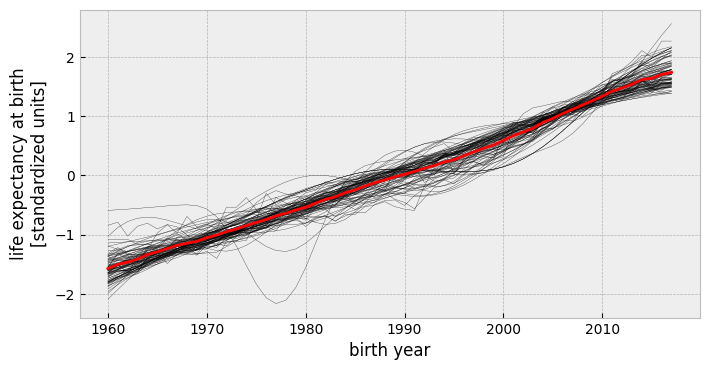

member countries  ['Afghanistan' 'Australia' 'Austria' 'Azerbaijan' 'Belgium' 'Bangladesh'
 'Bolivia' 'Brazil' 'Bhutan' 'Canada' 'Switzerland' 'Channel Islands'
 'Congo, Dem. Rep.' 'Czech Republic' 'Germany' 'Denmark'
 'Europe & Central Asia' 'Euro area' 'Eritrea' 'Spain' 'Ethiopia'
 'European Union' 'Finland' 'France' 'United Kingdom' 'Ghana' 'Guinea'
 'Guinea-Bissau' 'Equatorial Guinea' 'Guatemala' 'Guyana' 'High income'
 'Hong Kong SAR, China' 'Heavily indebted poor countries (HIPC)' 'Croatia'
 'IDA total' 'IDA only' 'Ireland' 'Iran, Islamic Rep.' 'Iceland' 'Italy'
 'Cambodia' 'Korea, Rep.' 'Lao PDR' 'Lebanon' 'Liberia'
 'Least developed countries: UN classification' 'Low income' 'Luxembourg'
 'Morocco' 'Moldova' 'Madagascar' 'Maldives' 'Mali' 'Malta' 'Mongolia'
 'Mozambique' 'Niger' 'Netherlands' 'Norway' 'Nepal' 'New Zealand'
 'OECD members' 'Philippines' 'Poland' 'Pre-demographic dividend'
 'Puerto Rico' 'Paraguay' 'Post-demographic dividend' 'French Polynesia'
 'Sudan' 'Singapor

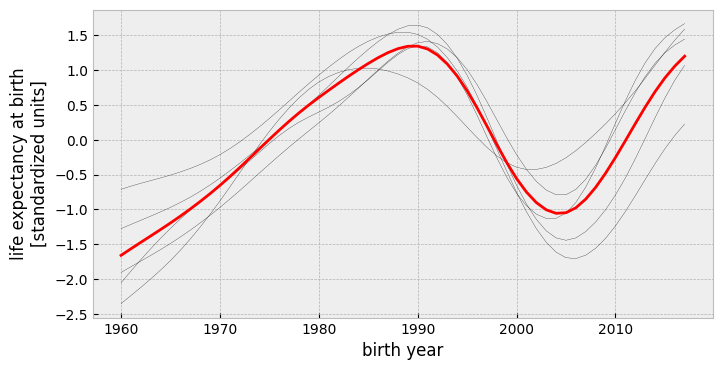

member countries  ['Central African Republic' 'Lesotho' 'Namibia' 'Eswatini' 'South Africa']





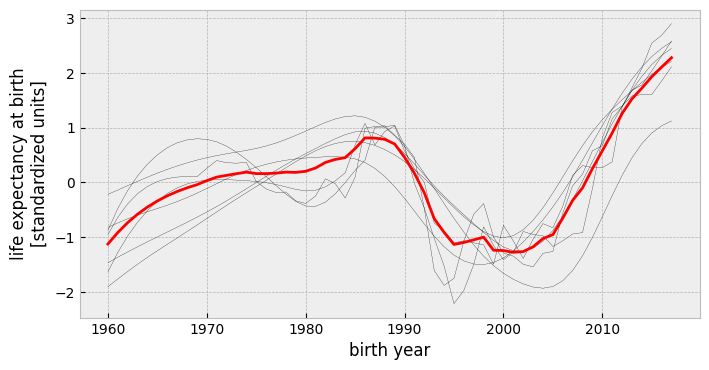

member countries  ['Belarus' 'Botswana' 'Kenya' 'Russian Federation' 'Ukraine' 'Zambia'
 'Zimbabwe']





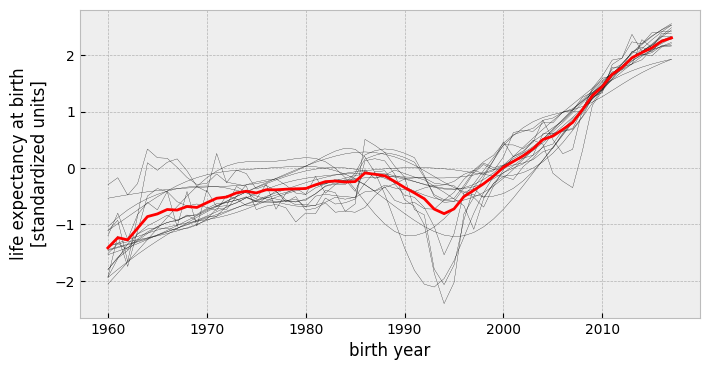

member countries  ['Angola' 'Armenia' 'Burundi' 'Bulgaria' 'Central Europe and the Baltics'
 'Congo, Rep.' 'Europe & Central Asia (excluding high income)' 'Estonia'
 'Hungary' 'Lithuania' 'Latvia' 'Malawi' 'Romania' 'Rwanda' 'Sierra Leone'
 'Europe & Central Asia (IDA & IBRD countries)' 'Tanzania' 'Uganda']





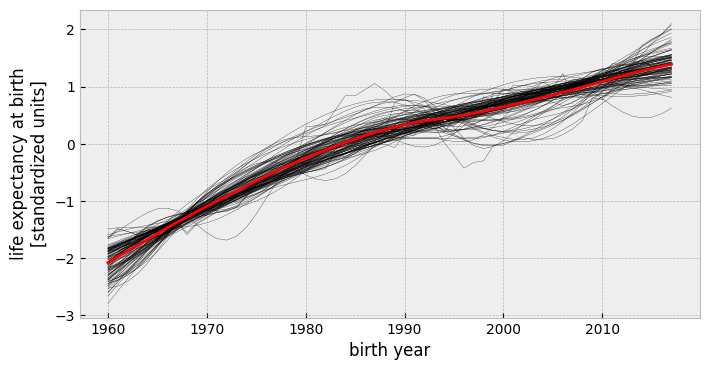

member countries  ['Aruba' 'Albania' 'Arab World' 'United Arab Emirates' 'Argentina'
 'Antigua and Barbuda' 'Benin' 'Burkina Faso' 'Bahrain' 'Bahamas, The'
 'Bosnia and Herzegovina' 'Belize' 'Barbados' 'Brunei Darussalam' 'Chile'
 'China' "Cote d'Ivoire" 'Cameroon' 'Colombia' 'Comoros' 'Cabo Verde'
 'Costa Rica' 'Caribbean small states' 'Cuba' 'Cyprus' 'Djibouti'
 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific' 'Ecuador'
 'Egypt, Arab Rep.' 'Fragile and conflict affected situations' 'Fiji'
 'Micronesia, Fed. Sts.' 'Gabon' 'Georgia' 'Gambia, The' 'Greece'
 'Grenada' 'Guam' 'Honduras' 'Haiti' 'IBRD only' 'IDA & IBRD total'
 'IDA blend' 'Indonesia' 'India' 'Iraq' 'Jamaica' 'Jordan' 'Japan'
 'Kazakhstan' 'Kyrgyz Republic' 'Kiribati' 'Kuwait'
 'Latin America & Caribbean (excluding high income)' 'Libya' 'St. Lucia'
 'Latin America & Caribbean' 'Sri Lanka' 'Lower middle income'
 'Low & middle income' 'Late-demog

In [ ]:
# -- now let's plot all cluster centers, their members, and print their member names

for cnum in range(km.n_clusters):

  # -- True/False index of where labels_ is cnum
  ind = km.labels_ == cnum

  # -- get the members of that cluster number
  mems = wbsub_st[ind]

  # -- make a plot
  ax = mems.T.plot(lw=0.2, color="k", legend=False, figsize=(8, 4))
  clusters.iloc[cnum].plot(color="r", ax=ax)
  ax.set_xlabel("birth year")
  ax.set_ylabel("life expectancy at birth\n[standardized units]")

  # -- refresh screen
  plt.pause(0.01)

  # -- print member countries and extra space
  print("member countries ", mems.index.values)
  print("\n\n")
